# Conflicting Labeling

In [50]:
import numpy as np
import pandas as pd
import re
import string
import unidecode #pip install unidecode
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
from pylab import *

# Read original csv file
df = pd.read_csv('tweets_public.csv', encoding='utf-16', index_col='tweet_id', sep=',')
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,
942743012337123328,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,Mon Dec 18 13:07:04 +0000 2017,NaN,Dublin
926857871916183553,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,Sat Nov 04 17:05:11 +0000 2017,NaN,NaN
936979305720090626,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,Sat Dec 02 15:24:09 +0000 2017,NaN,NaN
943983853802328064,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,Thu Dec 21 23:17:43 +0000 2017,NaN,Central Time (US & Canada)
938207464457211904,negative,True,0,0,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,NaN,Wed Dec 06 00:44:25 +0000 2017,NaN,Eastern Time (US & Canada)


In [51]:
def delete_urlvideodots(tweet):
    #Delete URLs www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #Delete VIDEO
    tweet = re.sub('((\[VIDEO\])|(#VIDEO)|#vIDEO)','',tweet)
    # Remove accents
    tweet = unidecode.unidecode(tweet)
    #Remove additional white spaces
    tweet = re.sub('\s+', ' ', tweet)
    return tweet

df['cleantext'] = df['text'].apply(delete_urlvideodots)

# Count the number ocurrences of each unique element in the 'cleantext' column
unicos = df['cleantext'].value_counts()
diff_tweets = unicos.index.tolist() # List of unique tweets
print('Number of unique tweets:',len(diff_tweets))

data = unicos.values #.tolist() # List of occurences
#df.sort_values('cleantext',ascending=False)

print('Number of tweets with repetitions:',data[data>1].shape)

print('Number of tweets repeated tweets:',sum(data[0:205]))

Number of unique tweets: 6884
Number of tweets with repetitions: (215,)
Number of tweets repeated tweets: 1178


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


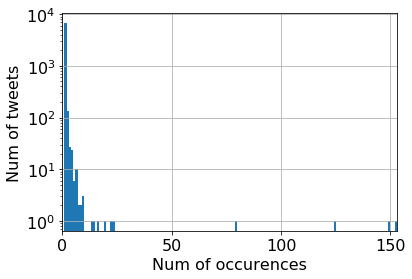

In [52]:
# Histogram Plot
binwidth = 1

rcParams['font.size'] = 16.0
matplotlib.rcParams['lines.linewidth'] = 7
matplotlib.rcParams['font.sans-serif'] = "League Gothic"
matplotlib.rcParams['font.family'] = "sans-serif"

fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth))
ax.set(xlabel='Num of occurences',ylabel='Num of tweets',xlim=[0,153])
ax.grid(True)
plt.yscale('log')
plt.show()

fig.set_size_inches(10,6)
fig.savefig('TweetsOccurences.jpg', bbox_inches='tight')

#### Check if the repreated tweets have the same sentiment labels

In [53]:
# Force the 'cleantext' column to be the index
df1 = df.set_index('cleantext')
# Keep tweet_id
df1 = pd.concat([df1, pd.DataFrame(data=df.index.values,index=df.cleantext,columns=['tweet_id'])], axis=1)
# Select only airline_sentiment and create a one-hot encoding.
textVSsentiment = pd.get_dummies(df1['airline_sentiment'])
textVSsentiment.head()

,negative,neutral,positive
cleantext,,,
"""Los pilotos de Ryanair desconvocan la huelga tras ver reconocidos sus sindicatos"" by El Pais via Ultimas noticias...",0,0,1
"@Iberia @lavecinarubia Si ,por favor las declaraciones de amor entre los #rubijarena no pueden quedarse en una ma...",0,0,1
@Iberia Me dirias por favor que costo tiene?,0,1,0
"@SupermanlopezN @Iberia @giroditalia Champion, no vuele mas con esos descarados.",1,0,0
@SrtaFarrellDM @KLM @Iberia Eso de avianca es verdad a mi mama le paso dos veces terrible esa aerolinea,1,0,0


In [54]:
spolls = textVSsentiment.groupby('cleantext').sum()
spolls['all'] = spolls.positive + spolls.negative + spolls.neutral
spolls.sort_values('all',ascending=False)

,negative,neutral,positive,all
cleantext,,,,
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaColombia. Hola 79 destinos europeos al mejor precio",21,76,56,153
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaArgentina. Hola 79 destinos europeos al mejor precio",14,91,44,149
"Asi fue el accidente del vuelo 5022 de Spanair, el mas letal en Espana en 2 decadas",76,48,0,124
Iberia Plus cumple 25 anos. Queremos celebrarlo contigo de una manera muy especial. Elige tu numero favorito y... !...,7,36,36,79
Ryanair retrasa hasta el 15 enero su cambio en la politica de equipaje de mano,7,12,4,23
@Iberia RT POR FAVOR: PASAJEROS QUE IBERIA LES DEMORA LA DEVOLUCION DEL DINERO. JODAMOSLOS. RETUITEEMOS y COMPARTAM...,22,0,0,22
"Japon Directo, vuelo con IBERIA a Tokyo, 10 dias desde 2.990EUR Tax Incl.",7,9,3,19
Iberia inaugura un nuevo espacio Premium para sentirte como una reina o un rey,4,0,12,16
@Ryanair Madrid #TravelThursday,3,7,4,14


In [55]:
# Identify sentiments ties
id1 = spolls[(spolls.positive == spolls.negative) & (spolls.neutral == 0)].index.tolist()
id2 = spolls[(spolls.neutral == spolls.negative) & (spolls.positive == 0)].index.tolist()
id3 = spolls[(spolls.positive == spolls.neutral) & (spolls.negative == 0)].index.tolist()
id4 = spolls[(spolls.positive == spolls.negative) & (spolls.negative == spolls.neutral)].index.tolist()
tweets_tie = id1+id2+id3+id4

In [56]:
# Drop tweets with sentiment ties (conflicting labeling)
spolls = spolls.drop(tweets_tie)
spolls.sort_values('all',ascending=False)

,negative,neutral,positive,all
cleantext,,,,
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaColombia. Hola 79 destinos europeos al mejor precio",21,76,56,153
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaArgentina. Hola 79 destinos europeos al mejor precio",14,91,44,149
"Asi fue el accidente del vuelo 5022 de Spanair, el mas letal en Espana en 2 decadas",76,48,0,124
Iberia Plus cumple 25 anos. Queremos celebrarlo contigo de una manera muy especial. Elige tu numero favorito y... !...,7,36,36,79
Ryanair retrasa hasta el 15 enero su cambio en la politica de equipaje de mano,7,12,4,23
@Iberia RT POR FAVOR: PASAJEROS QUE IBERIA LES DEMORA LA DEVOLUCION DEL DINERO. JODAMOSLOS. RETUITEEMOS y COMPARTAM...,22,0,0,22
"Japon Directo, vuelo con IBERIA a Tokyo, 10 dias desde 2.990EUR Tax Incl.",7,9,3,19
Iberia inaugura un nuevo espacio Premium para sentirte como una reina o un rey,4,0,12,16
@Ryanair Madrid #TravelThursday,3,7,4,14


In [57]:
# Drop tweets from original dataset
for tweet in tweets_tie:
    df1 = df1.drop(tweet,axis=0)

In [58]:
# Compute sentiment percentage for each tweet
sentiments = ['positive','negative','neutral']
for s in sentiments:
    spolls[s] = spolls.apply(lambda x: x[s]/x['all']*100., axis=1)
    
spolls.sort_values('all',ascending=False)

,negative,neutral,positive,all
cleantext,,,,
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaColombia. Hola 79 destinos europeos al mejor precio",13.725490,49.673203,36.601308,153
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaArgentina. Hola 79 destinos europeos al mejor precio",9.395973,61.073826,29.530200,149
"Asi fue el accidente del vuelo 5022 de Spanair, el mas letal en Espana en 2 decadas",61.290323,38.709677,0.000000,124
Iberia Plus cumple 25 anos. Queremos celebrarlo contigo de una manera muy especial. Elige tu numero favorito y... !...,8.860759,45.569620,45.569620,79
Ryanair retrasa hasta el 15 enero su cambio en la politica de equipaje de mano,30.434783,52.173913,17.391305,23
@Iberia RT POR FAVOR: PASAJEROS QUE IBERIA LES DEMORA LA DEVOLUCION DEL DINERO. JODAMOSLOS. RETUITEEMOS y COMPARTAM...,100.000000,0.000000,0.000000,22
"Japon Directo, vuelo con IBERIA a Tokyo, 10 dias desde 2.990EUR Tax Incl.",36.842105,47.368421,15.789473,19
Iberia inaugura un nuevo espacio Premium para sentirte como una reina o un rey,25.000000,0.000000,75.000000,16
@Ryanair Madrid #TravelThursday,21.428571,50.000000,28.571430,14


In [59]:
# Delete those with 1 occurence or labeled unanonimously with one single sentiment
conflict = spolls[(spolls['positive'] < 100) & (spolls['negative'] < 100) & (spolls['neutral'] < 100)]
conflictsent = conflict.drop(['all'], axis=1)
conflictsent = conflictsent.sort_values('negative',ascending=True)
conflictsent.head()

# Select smaller set of conlifctsent for plot
smaller_set = conflictsent[::3]
smaller_set.shape

(17, 3)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


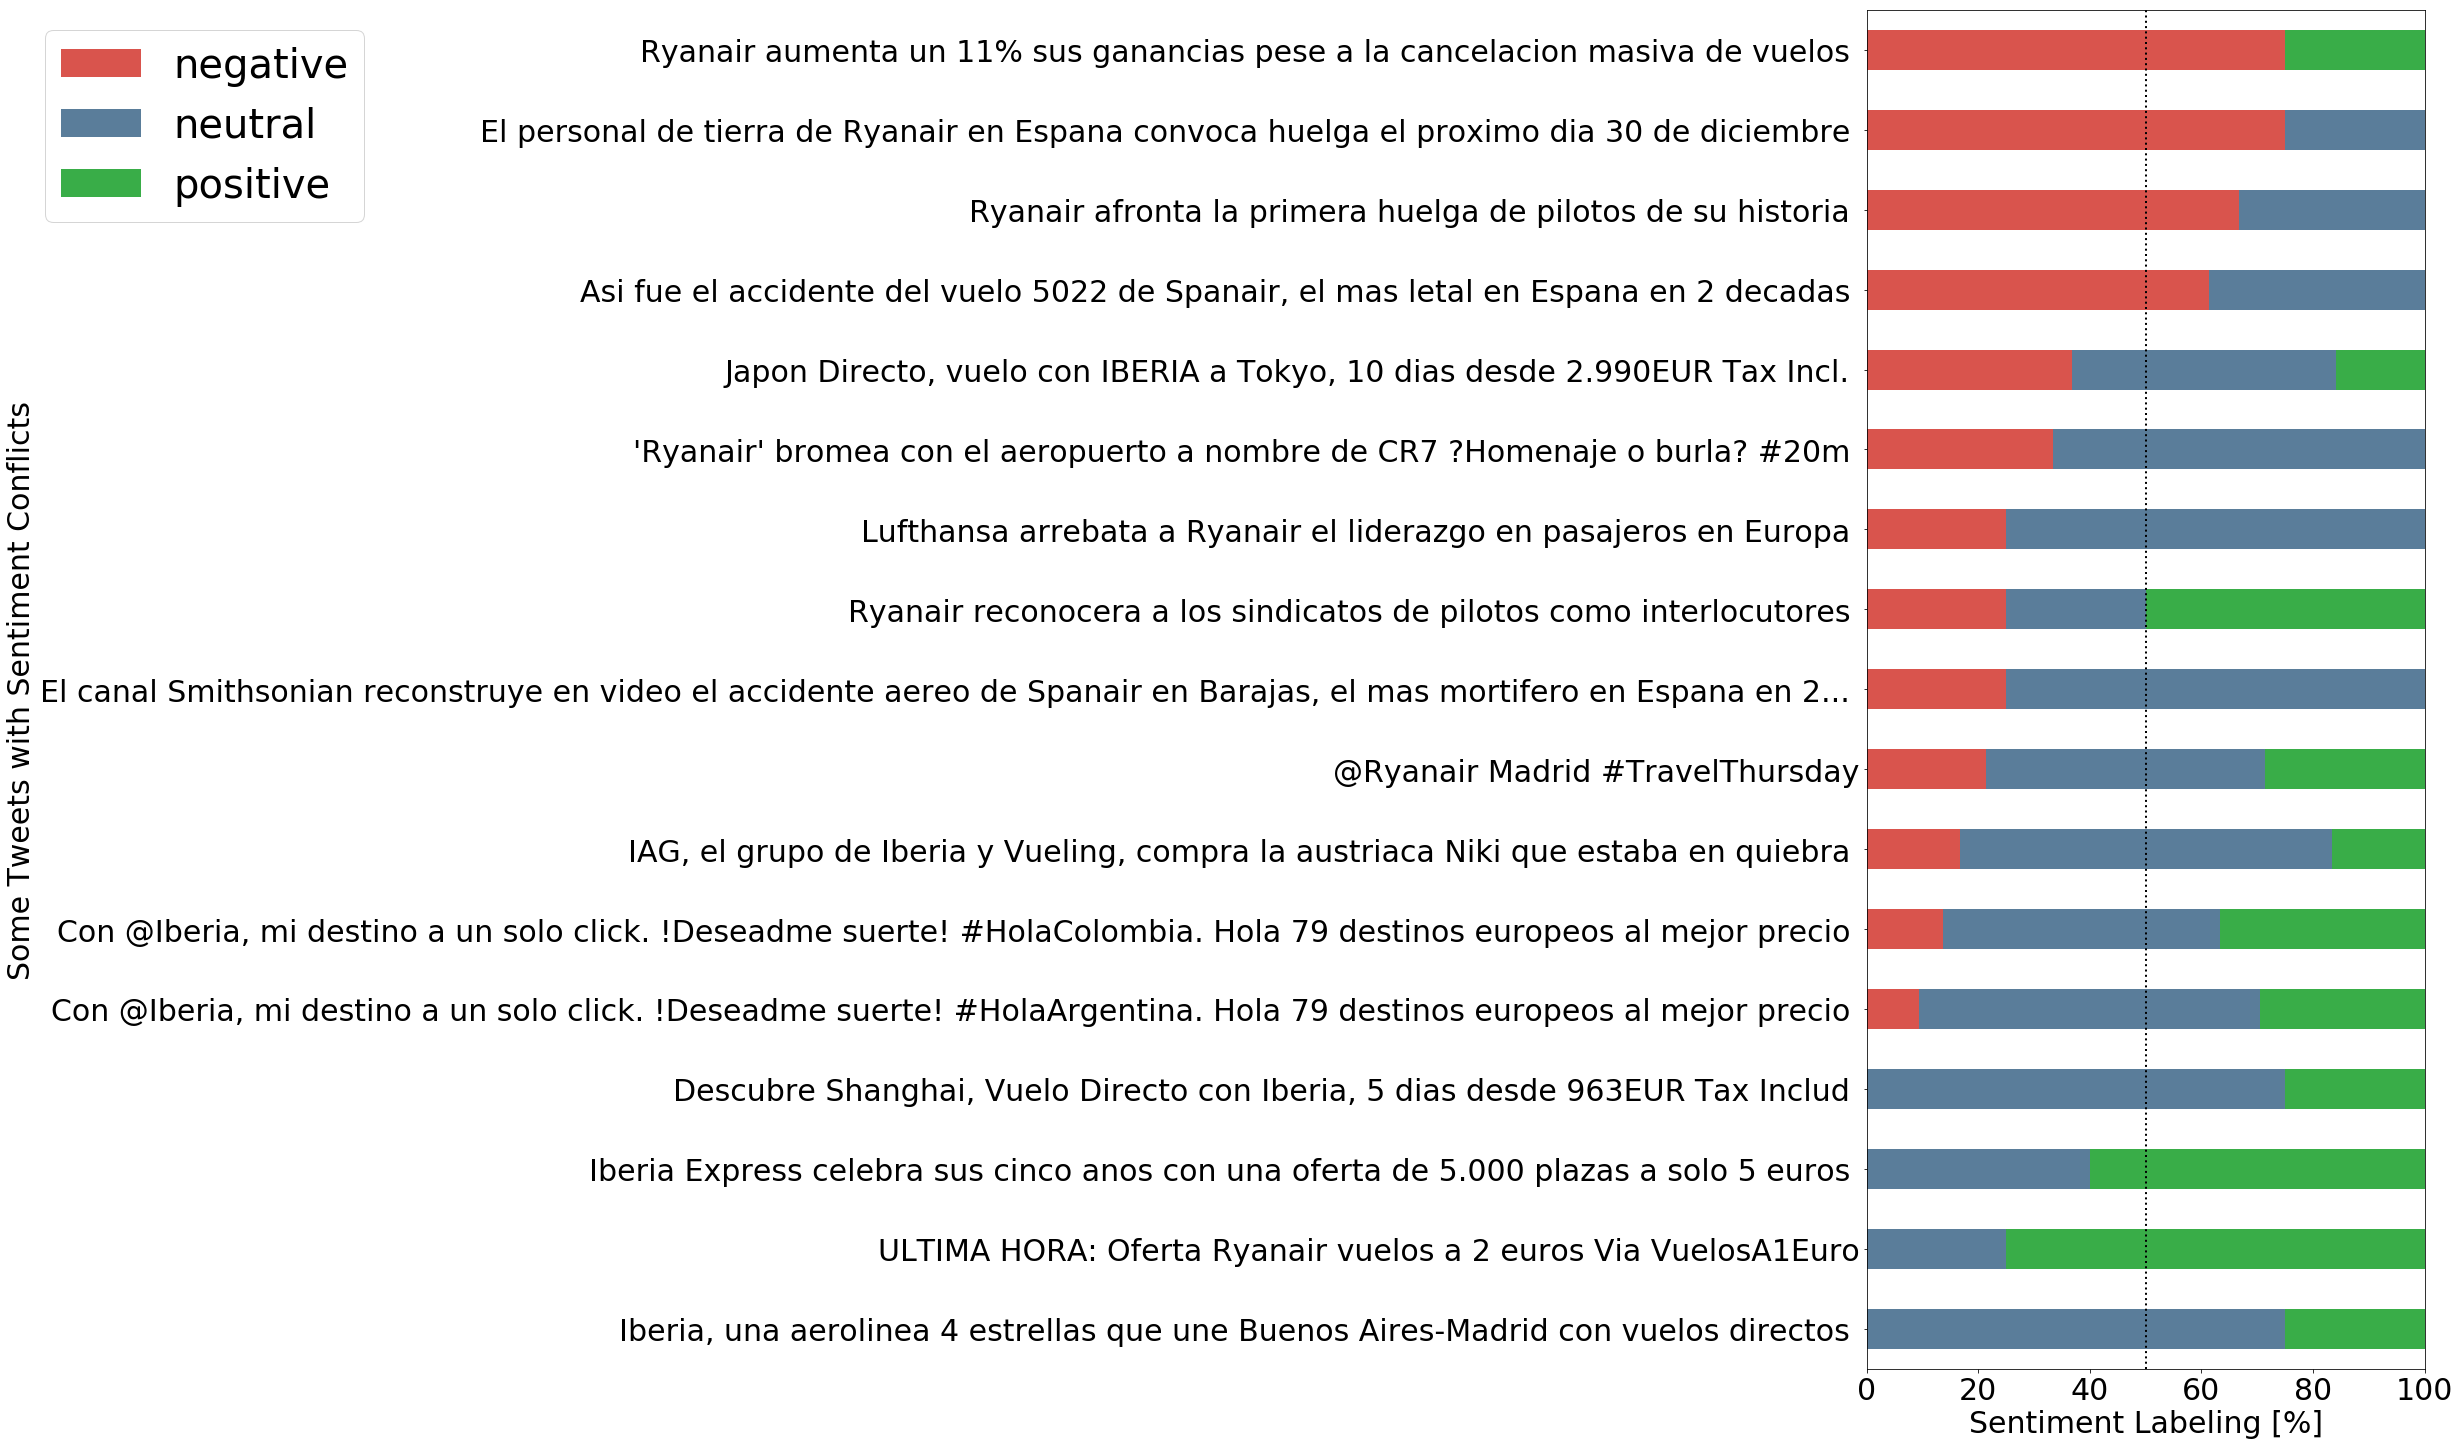

In [60]:
# Plot
rcParams['font.size'] = 30.0

my_colors = [sns.xkcd_rgb["pale red"],sns.xkcd_rgb["steel blue"], sns.xkcd_rgb["medium green"]]
ax = smaller_set.plot(kind='barh',stacked=True, color=my_colors,figsize=(10, 25))
ax.legend(loc='upper left',bbox_to_anchor=(-3.3, 1),prop={'size': 40})
ax.set_ylabel('Some Tweets with Sentiment Conflicts')
ax.set_xlabel('Sentiment Labeling [%]')
ax.set_xlim([0,100])
plt.axvline(x=50,color='black',linewidth=2,linestyle=':')
plt.savefig("ConflictingTweets.jpg", bbox_inches='tight',dpi=150)
plt.show()

In [61]:
# Delete duplicated tweets
#df2 = df.drop_duplicates(subset='cleantext',keep='first') 
#df3 = df2.drop('cleantext',axis=1)
# df3 contains no repeated tweets!!

In [63]:
conflictsent = conflict.drop(['all'], axis=1)
# Assign most common sentiment to tweets with conflicting polls
conflictsent['truesentiment'] = conflictsent.idxmax(axis=1)
conflictsent.head()

,negative,neutral,positive,truesentiment
cleantext,,,,
#Irlanda | Pilotos de aerolinea #Ryanair iniciaron huelga por mejores remuneraciones salariales...,57.142857,42.857143,0.000000,negative
'Ryanair' bromea con el aeropuerto a nombre de CR7 ?Homenaje o burla? #20m,33.333333,66.666667,0.000000,neutral
@Iberia Gracias,0.000000,75.000000,25.000000,neutral
@LifeLoversBcn @DescubreIsrael @promotourist @bthetravelbrand @travelwebcamses @logitravel @Destinia @eDreams_es...,33.333333,0.000000,66.666669,positive
@Ryanair Alicante #TravelThursday,25.000000,75.000000,0.000000,neutral


In [65]:
# Create new column with most common label for each conflicting tweet
df1['newairline_sentiment'] = df1['airline_sentiment']

# Replace airline_sentiment for the most common sentiment
for tweet in conflictsent.index:
    df1['newairline_sentiment'].replace(df1.loc[tweet,'airline_sentiment'],
                                                conflictsent.loc[tweet]['truesentiment'], inplace=True)

In [66]:
df1.loc[lista[3:4]]

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,tweet_id,newairline_sentiment
cleantext,,,,,,,,,,,
@LifeLoversBcn @DescubreIsrael @promotourist @bthetravelbrand @travelwebcamses @logitravel @Destinia @eDreams_es...,negative,True,0,0,@LifeLoversBcn @DescubreIsrael @promotourist @...,NaN,Thu Jan 04 09:53:23 +0000 2018,NaN,Madrid,948854866528620546,positive
@LifeLoversBcn @DescubreIsrael @promotourist @bthetravelbrand @travelwebcamses @logitravel @Destinia @eDreams_es...,positive,True,0,0,@LifeLoversBcn @DescubreIsrael @promotourist @...,NaN,Thu Jan 04 09:17:31 +0000 2018,NaN,Pacific Time (US & Canada),948845839778308096,positive
@LifeLoversBcn @DescubreIsrael @promotourist @bthetravelbrand @travelwebcamses @logitravel @Destinia @eDreams_es...,positive,True,0,0,@LifeLoversBcn @DescubreIsrael @promotourist @...,NaN,Thu Jan 04 10:38:41 +0000 2018,NaN,Madrid,948866265757732864,positive


In [23]:
# Save dataset with conflicting tweets re-labeled
dfsave = df1.set_index('tweet_id')
dfsave.to_csv('tweets_public2.csv', encoding='utf-16', sep=',')

In [24]:
# Read new csv file
df = pd.read_csv('tweets_public2.csv', encoding='utf-16', index_col='tweet_created', sep=',')
# Clean text field
df['cleantext'] = df['text'].apply(delete_urlvideodots)

# Drop duplicated tweets and keep one
dff = df.drop_duplicates('cleantext',keep='first')
dfff = dff.drop(['cleantext'], axis=1)
# Save dataset
dfff.to_csv('tweets_public3.csv', encoding='utf-16', sep=',')
dfff

,tweet_id,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_location,user_timezone,newairline_sentiment
tweet_created,,,,,,,,,,
Mon Dec 18 13:07:04 +0000 2017,942743012337123328,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,NaN,Dublin,positive
Sat Nov 04 17:05:11 +0000 2017,926857871916183553,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,NaN,NaN,positive
Sat Dec 02 15:24:09 +0000 2017,936979305720090626,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,NaN,NaN,neutral
Thu Dec 21 23:17:43 +0000 2017,943983853802328064,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,NaN,Central Time (US & Canada),negative
Wed Dec 06 00:44:25 +0000 2017,938207464457211904,negative,True,0,0,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,NaN,NaN,Eastern Time (US & Canada),negative
Fri Nov 17 14:17:37 +0000 2017,931526746301714435,neutral,True,0,0,"@Iberia hola, no conozco mi numéro IBERIA PLUS...",NaN,NaN,NaN,neutral
Wed Nov 22 17:24:47 +0000 2017,933385784228532233,neutral,False,0,0,El canal Smithsonian reconstruye en video el a...,NaN,NaN,NaN,neutral
Tue Nov 21 06:22:35 +0000 2017,932856751099142144,positive,False,0,0,"Con @Iberia, mi destino a un solo click. ¡Dese...",NaN,NaN,NaN,neutral
Mon Nov 06 19:47:38 +0000 2017,927623530585509889,negative,True,0,0,@facua Pueden ayudarme con una maleta perdida ...,NaN,NaN,NaN,negative


In [25]:
# Final Sanity check
# Force the 'cleantext' column to be the index
df1 = df.set_index('cleantext')
# Select only airline_sentiment and create a one-hot encoding.
textVSsentiment2 = pd.get_dummies(df1['newairline_sentiment'])

sentiment_polls = textVSsentiment2.groupby('cleantext').sum()
sentiment_polls['all'] = sentiment_polls.positive + sentiment_polls.negative + sentiment_polls.neutral

sentiment_polls.sort_values('all',ascending=False)

,negative,neutral,positive,all
cleantext,,,,
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaColombia. Hola 79 destinos europeos al mejor precio",0,153,0,153
"Con @Iberia, mi destino a un solo click. !Deseadme suerte! #HolaArgentina. Hola 79 destinos europeos al mejor precio",0,149,0,149
"Asi fue el accidente del vuelo 5022 de Spanair, el mas letal en Espana en 2 decadas",124,0,0,124
Iberia Plus cumple 25 anos. Queremos celebrarlo contigo de una manera muy especial. Elige tu numero favorito y... !...,0,79,0,79
Ryanair retrasa hasta el 15 enero su cambio en la politica de equipaje de mano,0,23,0,23
@Iberia RT POR FAVOR: PASAJEROS QUE IBERIA LES DEMORA LA DEVOLUCION DEL DINERO. JODAMOSLOS. RETUITEEMOS y COMPARTAM...,22,0,0,22
"Japon Directo, vuelo con IBERIA a Tokyo, 10 dias desde 2.990EUR Tax Incl.",0,19,0,19
Iberia inaugura un nuevo espacio Premium para sentirte como una reina o un rey,0,0,16,16
@Ryanair Madrid #TravelThursday,0,14,0,14


In [26]:
df.shape

(7706, 11)